# Weil Pairing

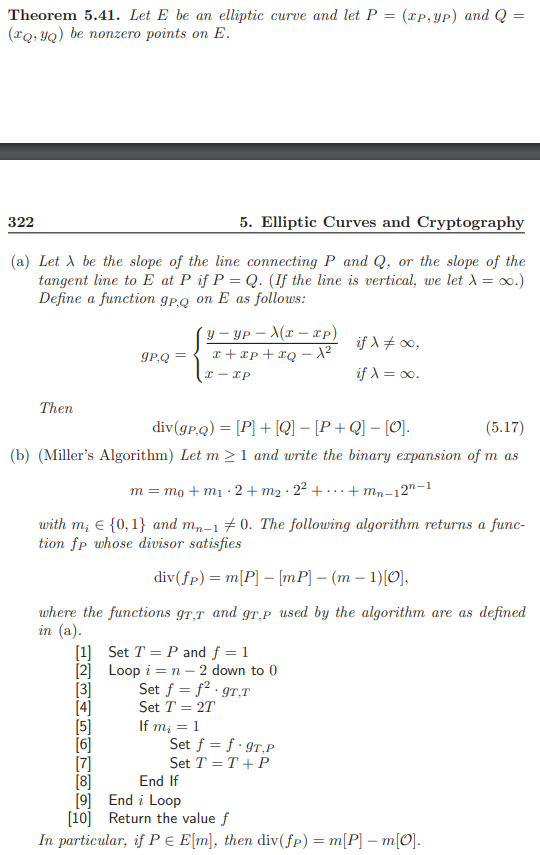

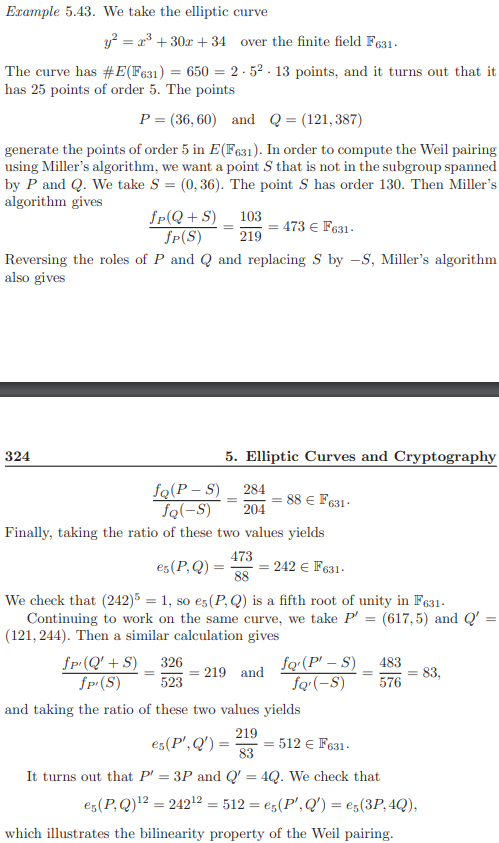

In [ ]:
class Point_on_EC:
  def __init__(self, x, y):
    self.x = x
    self.y = y

In [ ]:
class O:
  def __init__(self):
    self.x = "inf"
    self.y = "inf"

In [ ]:
import math
import random
import warnings
import numpy as np
import cmath

class Elliptic_curve:
  def __init__(self, A, B, p):
    self.A = A
    self.B = B
    self.p = p
    disc_check = (4*(self.A**3) + 27*(self.B**2)) % self.p
    if disc_check == 0:
      warnings.warn("The discriminant of elliptic curve is 0, some functions may raise Error.")
  
  def discriminant(self):
    return (4*(self.A**3) + 27*(self.B**2)) % self.p
  
  # def plot(self):
  #   a = self.A
  #   b = self.B

  #   y, x = np.ogrid[-self.p:self.p:200j, -self.p:self.p:200j]
  #   plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])
  #   plt.grid()
  #   plt.show()
  
  def __modulo_divide(self, p, q):
    p = int(p % self.p)
    q = int(q % self.p)
    for i in range(1, self.p):
      if (i * q) % self.p == p:
        return i
  
  def addition(self, P, Q):
    if self.discriminant() == 0:
      raise ValueError("Discriminant of elliptic curve is 0, please change value of 'A' and 'B' in 'y^2 = x^3 + A*x + b.")
    
    if isinstance(P, O):
      return Q
    elif isinstance(Q, O):
      return P
    elif P.x == Q.x and P.y == Q.y:
      if isinstance(P.x, complex) or isinstance(P.y, complex):
        l = self.complex_divide(complex((3*self.complex_multiply(P.x, P.x) + self.A).real % self.p, (3*self.complex_multiply(P.x, P.x)).imag % self.p), complex((2*P.y).real % self.p, (2*P.y).imag % self.p))
      else:
        l = self.__modulo_divide((3*(P.x*P.x) + self.A) % self.p, (2*P.y) % self.p)
    elif P.x == Q.x and (P.y.real == ((-Q.y).real % self.p) and P.y.imag == ((-Q.y).imag % self.p)):
      return O()
    else:
      if isinstance(P.x, complex) or isinstance(P.y, complex) or isinstance(Q.x, complex) or isinstance(Q.y, complex):
        l = self.complex_divide(complex((Q.y-P.y).real % self.p, (Q.y-P.y).imag % self.p), complex((Q.x-P.x).real % self.p, (Q.x-P.x).imag % self.p))
      else:
        l = self.__modulo_divide((Q.y-P.y) % self.p, (Q.x-P.x) % self.p)
    
    if isinstance(l, complex):
      x3 = complex((self.complex_multiply(l, l) - P.x - Q.x).real % self.p, (self.complex_multiply(l, l) - P.x - Q.x).imag % self.p)
      y3 = complex((self.complex_multiply(l, (P.x-x3)) - P.y).real % self.p, (self.complex_multiply(l, (P.x-x3)) - P.y).imag % self.p)
    else:
      x3 = (l*l - P.x - Q.x) % self.p
      y3 = (l*(P.x-x3) - P.y) % self.p
    return Point_on_EC(x3, y3)
  
  def subtraction(self, P):
    if self.discriminant() == 0:
      raise ValueError("Discriminant of elliptic curve is 0, please change value of 'A' and 'B' in 'y^2 = x^3 + A*x + b.")
    x = P.x

    if isinstance(P.y, complex):
      y_real = -P.y.real % self.p
      y_imag = -P.y.imag % self.p
      y = complex(y_real, y_imag)
    else:
      y = (-P.y) % self.p
    return Point_on_EC(x, y)
  
  def multiply(self, P, n):
    if self.discriminant() == 0:
      raise ValueError("Discriminant of elliptic curve is 0, please change value of 'A' and 'B' in 'y^2 = x^3 + A*x + b.")
    # Multiplying a point on Elliptic Curve using the Double-and_Add Algorithm
    Q = P
    R = O()
    # i = 0
    # print(i)
    # print(n)
    # print('Q', Q.x, Q.y)
    # print('R', R.x, R.y)
    # print("----------------")
    while n > 0:
      if (n % 2) == 1:
        R = self.addition(R, Q)
      Q = self.addition(Q, Q)
      n = math.floor(n/2)
      # i += 1
      # print(i)
      # print(n)
      # print('Q', Q.x, Q.y)
      # print('R', R.x, R.y)
      # print("----------------")
    return R
  
  def find_order(self, P):
    i = 1
    R = P
    # print(R.x, R.y)
    while not isinstance(R, O):
      # print(R.x, R.y)
      R = self.addition(P, R)
      i += 1
      if i > self.p:
        return False
    return i
    
  def __g_P_Q(self, P, Q, R):
    if isinstance(P, O):
      return Q
    elif isinstance(Q, O):
      return P
    elif P.x == Q.x and P.y == Q.y:
      if isinstance(P.x, complex) or isinstance(P.y, complex):
        l = self.complex_divide(complex((3*self.complex_multiply(P.x, P.x) + self.A).real % self.p, (3*self.complex_multiply(P.x, P.x)).imag % self.p), complex((2*P.y).real % self.p, (2*P.y).imag % self.p))
      else:
        l = self.__modulo_divide((3*(P.x*P.x) + self.A) % self.p, (2*P.y) % self.p)
    elif P.x == Q.x and (P.y.real == ((-Q.y).real % self.p) and P.y.imag == ((-Q.y).imag % self.p)):
      l = 'inf'
    else:
      if isinstance(P.x, complex) or isinstance(P.y, complex) or isinstance(Q.x, complex) or isinstance(Q.y, complex):
        l = self.complex_divide(complex((Q.y-P.y).real % self.p, (Q.y-P.y).imag % self.p), complex((Q.x-P.x).real % self.p, (Q.x-P.x).imag % self.p))
      else:
        l = self.__modulo_divide((Q.y-P.y) % self.p, (Q.x-P.x) % self.p)

    # print((3*(P.x*P.x) + self.A))
    # print((3*(P.x*P.x) + self.A) % self.p)
    # print((2*P.y) % self.p)
    # print('l', l)

    if l != "inf":
      if isinstance(l, complex) or any(isinstance(a, complex) for a in [P.x, P.y, Q.x, R.x, R.y]):
        return self.complex_divide(complex((R.y - P.y - self.complex_multiply(l, (R.x - P.x))).real % self.p, (R.y - P.y - self.complex_multiply(l, (R.x - P.x))).imag % self.p), complex((R.x + P.x + Q.x - self.complex_multiply(l, l)).real % self.p, (R.x + P.x + Q.x - self.complex_multiply(l, l)).imag % self.p))
      else:
        return self.__modulo_divide((R.y - P.y - l*(R.x - P.x)) % self.p, (R.x + P.x + Q.x - (l*l)) % self.p)
    else:
      if isinstance(l, complex) or any(isinstance(a, complex) for a in [P.x, P.y, Q.x, R.x, R.y]):
        return complex((R.x - P.x).real % self.p, (R.x - P.x).imag % self.p)
      else:
        return (R.x - P.x) % self.p
  
  def __millers_algo(self, order, P, R):
    T = P
    f = 1
    m = bin(order)[2:]
    for i in range(1, len(m)):
      if isinstance(f, complex) or isinstance(self.__g_P_Q(T, T, R), complex):
        f = self.complex_multiply(self.complex_multiply(f, f), self.__g_P_Q(T, T, R))
      else:
        f = (((f*f) % self.p) * self.__g_P_Q(T, T, R)) % self.p
      # print('gtt', self.__g_P_Q(T, T, R))
      # print('f', f)
      T = self.addition(T, T)
      # print('T', T.x, T.y)
      # print('P', P.x, P.y)
      # print('mi', m[i])
      if int(m[i]) == 1:
        if isinstance(f, complex) or isinstance(self.__g_P_Q(T, P, R), complex):
          # print('aaa', self.__g_P_Q(T, P, R))
          f = self.complex_multiply(f, self.__g_P_Q(T, P, R))
        else:
          f = (f * self.__g_P_Q(T, P, R)) % self.p
        # print('gtp1', self.__g_P_Q(T, P, R))
        # print('f1', f)
        T = self.addition(T, P)
    #     print('T1', T.x, T.y)
    # print('----------')
    return f
  
  #https://rosettacode.org/wiki/Jacobi_symbol
  def __jacobi(self, a):
    p = self.p
    if p <= 0:
        raise ValueError("'n' must be a positive integer.")
    if p % 2 == 0:
        raise ValueError("'n' must be odd.")
    a %= p
    result = 1
    while a != 0:
        while a % 2 == 0:
            a /= 2
            n_mod_8 = p % 8
            if n_mod_8 in (3, 5):
                result = -result
        a, p = p, a
        if a % 4 == 3 and p % 4 == 3:
            result = -result
        a %= p
    if p == 1:
        return result
    else:
        return 0
  
  def __power(self, x, y): 
    res = 1
    x = x % self.p
 
    while (y > 0):
        if ((y % 2) == 1):
            res = (res * x) % self.p
 
        y = math.floor(y/2)
        x = (x * x) % self.p
 
    return res
  
  def __gcd(self, a, b):
    if b == 0:
      return a
    else:
      return self.__gcd(b, a % b)

  
  #Tonelli-Shanks Algorithm
  def __square_root(self, a):

    if self.__gcd(a, self.p) != 1:
      return "a and p not coprime."
    
    if self.__jacobi(a) == -1:
      return 'not available'
    
    q = int(self.p - 1)
    s = 0
    while ((q % 2) == 0):
      q /= 2
      s += 1
    
    z = 2
    while True:
      if self.__power(z, (self.p - 1)/2):
        break
      z += 1
    
    M = s
    c = self.__power(z, q)
    t = self.__power(a, q)
    R = self.__power(a, (q+1)/2)

    while True:
      if t == 0:
        return 0
      elif t == 1:
        return R
      else:
        i = 1
        while i < M:
          if self.__power(t, 2**i) == 1:
            break
          i += 1
        b = self.__power(c, 2**(M-i-1))
        M = i
        c = self.__power(b, 2)
        t = (t * self.__power(b, 2)) % self.p
        R = (R * b) % self.p
  
  def evaluate(self, x):
    if isinstance(x, complex):
      res_x = (self.complex_multiply(self.complex_multiply(x, x), x) + self.complex_multiply(self.A, x) + self.B).real % self.p
      res_y = (self.complex_multiply(self.complex_multiply(x, x), x) + self.complex_multiply(self.A, x) + self.B).imag % self.p
      res = complex(res_x, res_y)
      if not isinstance(self.complex_square_root(res), complex):
        return 'x'
      else:
        return self.complex_square_root(res)
    else:
      res = (x**3 + self.A * x + self.B) % self.p
      if not isinstance(self.__square_root(res), int):
        return 'x'
      else:
        return self.__square_root(res)
  
  def __generate_rand_point(self, state="real"):
    # random.seed(5)
    y = 'x'
    if state == "real":
      while not isinstance(y, int):
        x = random.randint(0, self.p)
      # print(x)
      # x = 0
        y = self.evaluate(x)
    
    if state == "complex":
      while not (isinstance(y, int) or isinstance(y, complex)):
        x_real = random.randint(0, self.p)
        x_imag = random.randint(0, self.p)
        x = complex(x_real, x_imag)
      # print(x)
      # x = 0
        y = self.evaluate(x)
    return Point_on_EC(x, y)
  
  def span_check(self, P, S):
    if self.discriminant() == 0:
      raise ValueError("Discriminant of elliptic curve is 0, please change value of 'A' and 'B' in 'y^2 = x^3 + A*x + b'.")

    if (P.x == S.x) and (P.y == S.y):
      return True

    order = self.find_order(P)
    
    Q = P

    for i in range(order):
      Q = self.addition(Q, P)
      if (Q.x == S.x) and (Q.y == S.y):
        return True
    return False

  def distortion_map(self, P):
    if P.x == 'inf':
      x = 0
    else:
      x = -P.x % self.p
    if P.y == 'inf':
      y = 0
    else:
      y = complex(0, P.y % self.p)
    return Point_on_EC(x, y)
  
  def complex_multiply(self, a, b):
    res = a*b
    return complex(res.real % self.p, res.imag % self.p)
  
  def complex_divide(self, a, b):
    left_up = ((a.real * b.real) + (a.imag * b.imag)) % self.p
    left_down = ((b.real * b.real) + (b.imag * b.imag)) % self.p
    right_up = ((a.imag * b.real) - (a.real * b.imag)) % self.p
    right_down = ((b.real * b.real) + (b.imag * b.imag)) % self.p

    if left_down == 0 or right_down == 0:
      raise ValueError("Cannot divide")
    
    # print('lu', left_up)
    # print('ld', left_down)
    # print('ru', right_up)
    # print('rd', right_down)

    if left_up == 0 and right_up == 0:
      return complex(0, 0)
    
    elif left_up == 0:
      left = 0
      right = self.__modulo_divide(right_up, right_down)

    elif right_up == 0:
      left = self.__modulo_divide(left_up, left_down)
      right = 0
    
    else:
      left = self.__modulo_divide(left_up, left_down)
      right = self.__modulo_divide(right_up, right_down)

    # print('l', left)
    # print('r', right)

    return complex(left, right)
  
  def complex_square_root(self, a):
    if a.imag == 0:
      return False

    alpha = int(((a.real*a.real) - ((-1)*a.imag*a.imag)) % self.p)
    gamma = self.__power(alpha, (self.p-1)/2)
    if gamma == -1:
      return False

    alpha = self.__square_root(alpha)
    if not isinstance(alpha, int):
      return False

    delta = self.__modulo_divide((a.real + alpha) % self.p, 2)
    gamma = self.__power(delta, (self.p-1)/2)

    if gamma == -1:
      delta = self.__modulo_divide((a.real-alpha) % self.p, 2)

    real = self.__square_root(delta)
    if not isinstance(real, int):
      return False

    imag = self.__modulo_divide(a.imag, (2*real) % self.p)
    return complex(real, imag)
  
  def gen(self, state):
    return self.__generate_rand_point(state)
    
  def weil_pairing(self, P, Q, S='foo'):
    if self.discriminant() == 0:
      raise ValueError("Discriminant of elliptic curve is 0, please change value of 'A' and 'B' in 'y^2 = x^3 + A*x + b'.")
    
    
    m_p = self.find_order(P)
    m_q = self.find_order(Q)

    same_subgroup = self.span_check(P, Q)

    if same_subgroup:
      dist_Q = self.distortion_map(Q)
      print(dist_Q.x, dist_Q.y)
      m_dist_Q = self.find_order(dist_Q)

    span_p = True
    span_q = True

    if S != 'foo':
      is_span_p = self.span_check(P, S)
      is_span_q = self.span_check(Q, S)

      if is_span_p or is_span_q:
        raise ValueError("Enter point S that is not in the subgroup spanned by P and Q.")
        # print('test1')

      elif not isinstance(S, Point_on_EC):
        raise ValueError("Enter point S on elliptic curve.")
        # print('test2')
      
      elif S.x == S.y == 0:
        pass
      
      elif isinstance(S.x, int) and isinstance(S.y, int):
        if S.y != self.evaluate(S.x) and S.y != -self.evaluate(S.x):
          # print(S.y)
          raise ValueError("S is not a valid point on the elliptic curve.")
          # print('test3')

      elif isinstance(S.x, complex) or isinstance(S.y, complex):
        if S.y != self.evaluate(S.x) and S.y != complex((-self.evaluate(S.x)).real % self.p, (-self.evaluate(S.x)).imag % self.p):
          raise ValueError("S is not a valid point on the elliptic curve.")
    
    else:
      if same_subgroup:
        while span_p or span_q:
          S = self.__generate_rand_point(state="complex")
          span_p = self.span_check(P, S)
          span_q = self.span_check(Q, S)
      
    # print('x', S.x, 'y', S.y)
    # print('px', P.x, 'py', P.y)
    # print('qx', Q.x, 'qy', Q.y)

    min_S = self.subtraction(S)

    if same_subgroup:
      upper_upper = self.__millers_algo(m_p, P, self.addition(dist_Q, S))
      upper_lower = self.__millers_algo(m_p, P, S)

      lower_upper = self.__millers_algo(m_dist_Q, dist_Q, self.addition(P, min_S))
      lower_lower = self.__millers_algo(m_dist_Q, dist_Q, min_S)
    
    else:
      upper_upper = self.__millers_algo(m_p, P, self.addition(Q, S))
      upper_lower = self.__millers_algo(m_p, P, S)

      # print('QS', self.addition(Q, S).x, self.addition(Q, S).y)

      lower_upper = self.__millers_algo(m_q, Q, self.addition(P, min_S))
      lower_lower = self.__millers_algo(m_q, Q, min_S)

      # print('PS', self.addition(P, min_S).x, self.addition(P, min_S).y)
      # print('-S', min_S.x, min_S.y)

    # print('uu', upper_upper)
    # print('ul', upper_lower)
    # print('u', upper)
    # print('lu', lower_upper)
    # print('ll', lower_lower)
    # print('l', lower)

    if same_subgroup:
      upper = self.complex_divide(upper_upper, upper_lower)
      lower = self.complex_divide(lower_upper, lower_lower)
      return self.complex_divide(upper, lower)
    
    else:
      upper = self.__modulo_divide(upper_upper, upper_lower)
      lower = self.__modulo_divide(lower_upper, lower_lower)

    return self.__modulo_divide(upper, lower)
  
  def tate_pairing(self, P, Q, S='foo'):
    if self.discriminant() == 0:
      raise ValueError("Discriminant of elliptic curve is 0, please change value of 'A' and 'B' in 'y^2 = x^3 + A*x + b.")

    if S != 'foo':
      is_span_p = self.span_check(P, S)
      is_span_q = self.span_check(Q, S)

      if is_span_p or is_span_q:
        raise ValueError("Enter point S that is not in the subgroup spanned by P and Q.")
        # print('test1')

      elif not isinstance(S, Point_on_EC):
        raise ValueError("Enter point S on elliptic curve.")
        # print('test2')
      
      elif S.y != self.evaluate(S.x) and S.y != (-self.evaluate(S.x)) % self.p:
        raise ValueError("S is not a valid point on the elliptic curve.")
        # print('test3')
    
    else:
      m_p = self.find_order(P)
      span_p = True
      while span_p:
        S = self.__generate_rand_point()
        span_p = self.span_check(P, S)
    
    upper = self.__millers_algo(m_p, P, self.addition(Q, S))
    lower = self.__millers_algo(m_p, P, S)
  
    return self.__modulo_divide(upper, lower)

In [ ]:
p = 547
A = 1
B = 0
E = Elliptic_curve(A, B, p)
P = Point_on_EC(67, 481)
# P5 = E.multiply(P, 5)
Q = Point_on_EC(2, 253)
Q4 = E.multiply(Q, 4)
# print(Q4.x, Q4.y)
# print(E.distortion_map(P).x, E.distortion_map(P).y)
# S = Point_on_EC(complex(256, 110), complex(441, 15))
# E.weil_pairing(P, P, S)

In [ ]:
gx = 67
g = Point_on_EC(gx, E.evaluate(gx))
print(E.find_order(g))

137


In [ ]:
a = Point_on_EC(480, complex(0, 481))
E.find_order(a)

137

In [ ]:
S = Point_on_EC(complex(256, 110), complex(441, 15))
z = E.weil_pairing(P, P, S)
print(z)

480 481j
(37+452j)


In [ ]:
E_1 = Elliptic_curve(30, 34, 631)
P_1 = Point_on_EC(36, 60)
Q_1 = Point_on_EC(121, 387)
S_1 = Point_on_EC(0, 36)
print(E_1.weil_pairing(P_1, Q_1, S_1))

242
